In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [76]:
names=["name","MDVP:Fo(Hz)","MDVP:Fhi(Hz)","MDVP:Flo(Hz)","MDVP:Jitter(%)","MDVP:Jitter(Abs)","MDVP:RAP","MDVP:PPQ","Jitter:DDP","MDVP:Shimmer","MDVP:Shimmer(dB)","Shimmer:APQ3","Shimmer:APQ5","MDVP:APQ","Shimmer:DDA","NHR","HNR","status","RPDE","DFA","spread1","spread2","D2","PPE"]
df=pd.read_csv("sss.csv",names=names)
df.drop(['name'],axis=1,inplace=True)

In [77]:
for i,col in enumerate(df.columns):
  print(i+1,"Column is ",col)

1 Column is  MDVP:Fo(Hz)
2 Column is  MDVP:Fhi(Hz)
3 Column is  MDVP:Flo(Hz)
4 Column is  MDVP:Jitter(%)
5 Column is  MDVP:Jitter(Abs)
6 Column is  MDVP:RAP
7 Column is  MDVP:PPQ
8 Column is  Jitter:DDP
9 Column is  MDVP:Shimmer
10 Column is  MDVP:Shimmer(dB)
11 Column is  Shimmer:APQ3
12 Column is  Shimmer:APQ5
13 Column is  MDVP:APQ
14 Column is  Shimmer:DDA
15 Column is  NHR
16 Column is  HNR
17 Column is  status
18 Column is  RPDE
19 Column is  DFA
20 Column is  spread1
21 Column is  spread2
22 Column is  D2
23 Column is  PPE


In [78]:
pca = PCA(n_components=2)
principalcomp_parkinsons = pca.fit_transform(df)
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [79]:
principal_parkinsons_Df = pd.DataFrame(data = principalcomp_parkinsons, columns = ['principal component 1', 'principal component 2'])
principal_parkinsons_Df.tail()

,principal component 1,principal component 2
190,35.519891,-12.332294
191,64.389564,0.320926
192,42.747137,-29.494768
193,200.623819,-46.447747
194,71.548049,-7.301745


In [83]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.72898204 0.21824342]


<Figure size 432x288 with 0 Axes>

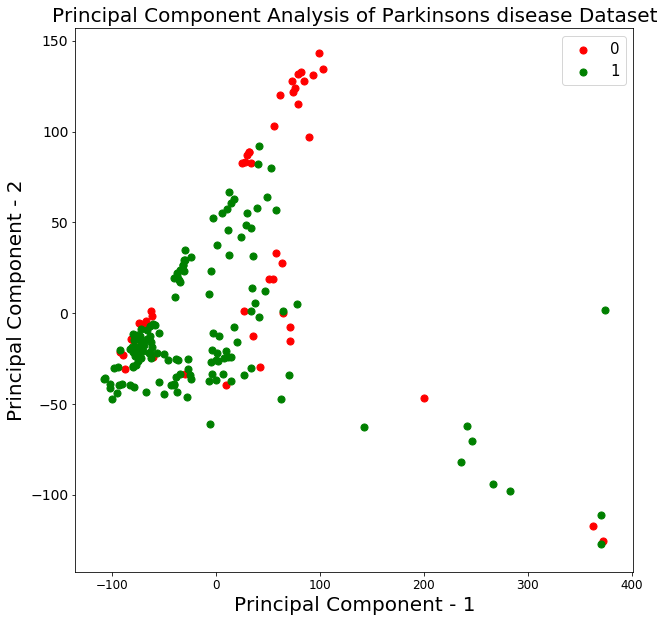

In [81]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Parkinsons disease Dataset",fontsize=20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
     indicesToKeep = df['status'] == target
     plt.scatter(principal_parkinsons_Df.loc[indicesToKeep, 'principal component 1'], principal_parkinsons_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)
plt.legend(targets,prop={'size': 15})